<a href="https://colab.research.google.com/github/jelimo-charity/smartphone-usage-analysis/blob/main/Mobile_device_usage_and_user_behaviour.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Loading the data**

In [1]:
!pip install opendatasets


**The command installs the opendatasets library - which simplifies the process of downloading and accessing publicly available datasets from various sources such as kaggle, google drive etc.**

In [2]:
import opendatasets as od
od.download("https://www.kaggle.com/datasets/valakhorasani/mobile-device-usage-and-user-behavior-dataset")


Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: charityjelimo
Your Kaggle Key: ··········
Dataset URL: https://www.kaggle.com/datasets/valakhorasani/mobile-device-usage-and-user-behavior-dataset


100%|██████████| 11.3k/11.3k [00:00<00:00, 4.88MB/s]

**The commands allow us to download the specific dataset we need.**

# **Data Overview**

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv("/content/mobile-device-usage-and-user-behavior-dataset/user_behavior_dataset.csv")

In [ ]:
print(data.head())

   User ID    Device Model Operating System  App Usage Time (min/day)  \
0        1  Google Pixel 5          Android                       393   
1        2       OnePlus 9          Android                       268   
2        3    Xiaomi Mi 11          Android                       154   
3        4  Google Pixel 5          Android                       239   
4        5       iPhone 12              iOS                       187   

   Screen On Time (hours/day)  Battery Drain (mAh/day)  \
0                         6.4                     1872   
1                         4.7                     1331   
2                         4.0                      761   
3                         4.8                     1676   
4                         4.3                     1367   

   Number of Apps Installed  Data Usage (MB/day)  Age  Gender  \
0                        67                 1122   40    Male   
1                        42                  944   47  Female   
2                

**We observe that we have 11 columns. 8 of the columns have numerical data, while the three columns have categorical data.**

In [ ]:
print(data.describe())

         User ID  App Usage Time (min/day)  Screen On Time (hours/day)  \
count  700.00000                700.000000                  700.000000   
mean   350.50000                271.128571                    5.272714   
std    202.21688                177.199484                    3.068584   
min      1.00000                 30.000000                    1.000000   
25%    175.75000                113.250000                    2.500000   
50%    350.50000                227.500000                    4.900000   
75%    525.25000                434.250000                    7.400000   
max    700.00000                598.000000                   12.000000   

       Battery Drain (mAh/day)  Number of Apps Installed  Data Usage (MB/day)  \
count               700.000000                700.000000           700.000000   
mean               1525.158571                 50.681429           929.742857   
std                 819.136414                 26.943324           640.451729   
min      

In [ ]:
print(data.isnull().sum())

User ID                       0
Device Model                  0
Operating System              0
App Usage Time (min/day)      0
Screen On Time (hours/day)    0
Battery Drain (mAh/day)       0
Number of Apps Installed      0
Data Usage (MB/day)           0
Age                           0
Gender                        0
User Behavior Class           0
dtype: int64


**The dataset has 700 complete records for each of its columns, and we have no missing or null values.**

# **Exploratory data analysis**

### Distribution of Operating systems

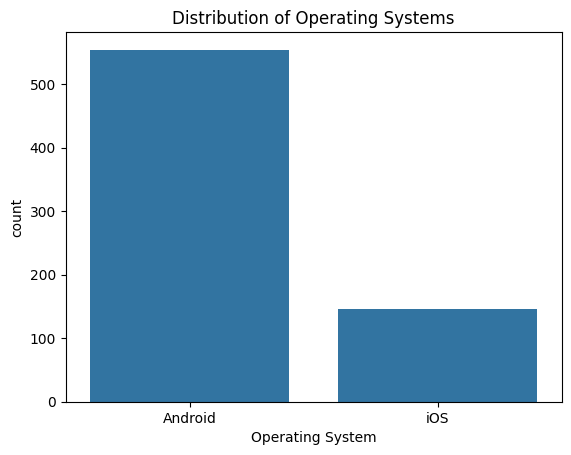

In [4]:
# distribution of operating systems
sns.countplot(x='Operating System', data=data)
plt.title('Distribution of Operating Systems')
plt.show()


**There are more android devices than ios devices**.  




### Distribution of age

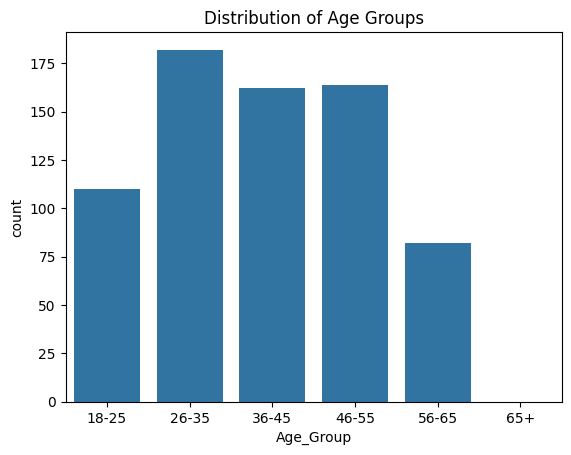

In [5]:
# Group age and distribute
bins = [18, 25,35,45,55,65,100]
labels = ['18-25', '26-35', '36-45', '46-55', '56-65', '65+']

data['Age_Group'] = pd.cut(data['Age'], bins=bins, labels=labels, right=False)

sns.countplot(x='Age_Group', data=data)
plt.title('Distribution of Age Groups')
plt.show()


**The age distribution shows a high concentration of of users in the middle age groups from 26-55. The most common age group is 26-35. While there are users in older age groups, their representation gradually decreases with age. This suggests that mobile devices is primarily attracting and engaging a younger audience.**

### Gender distribution

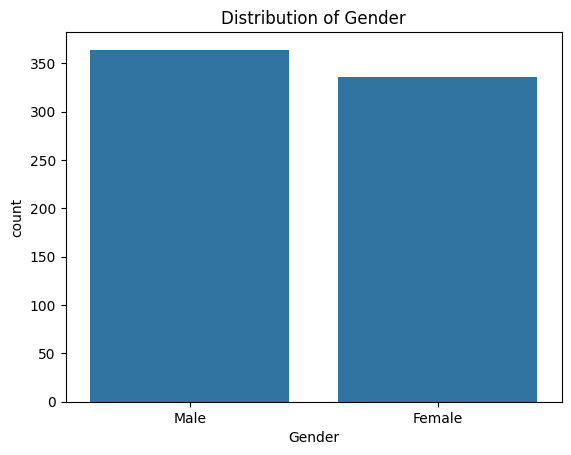

In [6]:
# distribution of gender
sns.countplot(x='Gender', data=data)
plt.title('Distribution of Gender')
plt.show()

**The gender distribution among users is nearly even, with a slight predominance of males. While there's a small difference in the number of male and female users, this gender disparity appears to have minimal influence on mobile usage patterns and overall user behavior.**

### Distribution of App usage time vs Screen on time

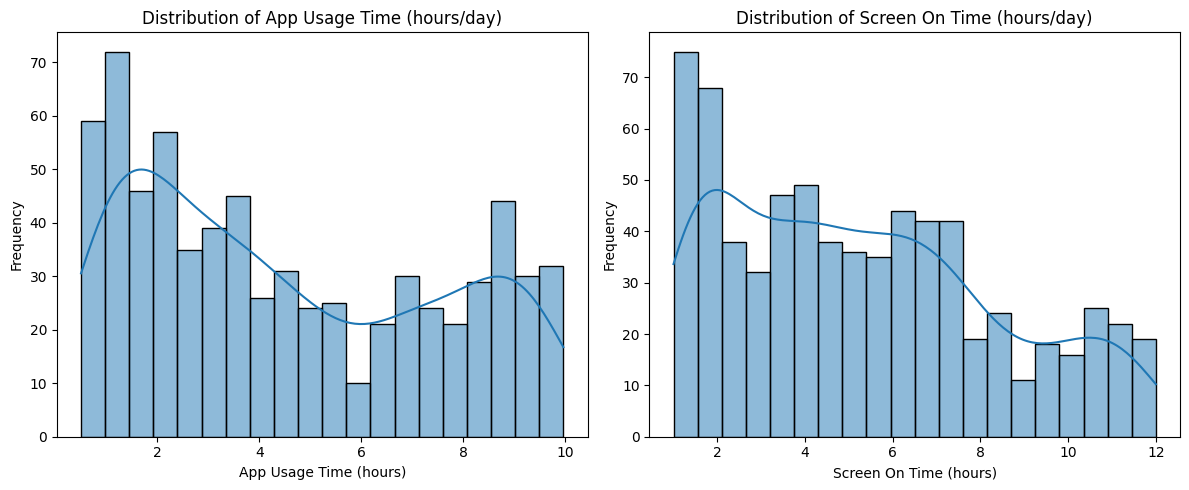

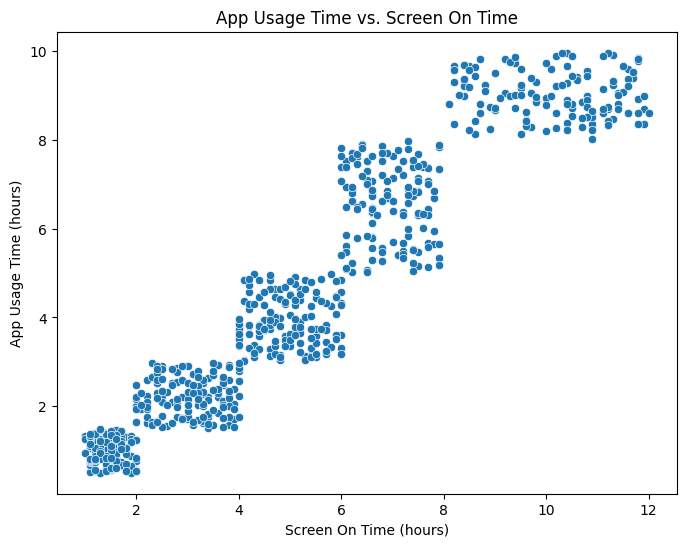

In [8]:

# Convert app usage time to hours
data['App_Usage_Time_hours'] = data['App Usage Time (min/day)'] / 60

# Histograms for individual distributions
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.histplot(data['App_Usage_Time_hours'], bins=20, kde=True)
plt.title('Distribution of App Usage Time (hours/day)')
plt.xlabel('App Usage Time (hours)')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
sns.histplot(data['Screen On Time (hours/day)'], bins=20, kde=True)
plt.title('Distribution of Screen On Time (hours/day)')
plt.xlabel('Screen On Time (hours)')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

# Scatterplot to compare App Usage Time vs. Screen On Time
plt.figure(figsize=(8, 6))
sns.scatterplot(data=data, x='Screen On Time (hours/day)', y='App_Usage_Time_hours')
plt.title('App Usage Time vs. Screen On Time')
plt.xlabel('Screen On Time (hours)')
plt.ylabel('App Usage Time (hours)')
plt.show()



## **Model to predict screen on time based on App usage time**

Linear Regression:
Mean Squared Error: 1.0150691050900702
R-squared: 0.8868679390545195

Random Forest Regression:
Mean Squared Error: 0.7556772631117908
R-squared: 0.9157778265964551


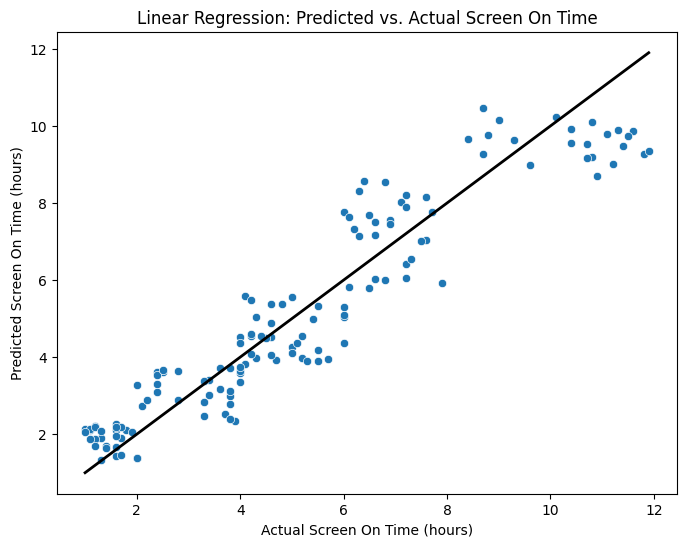

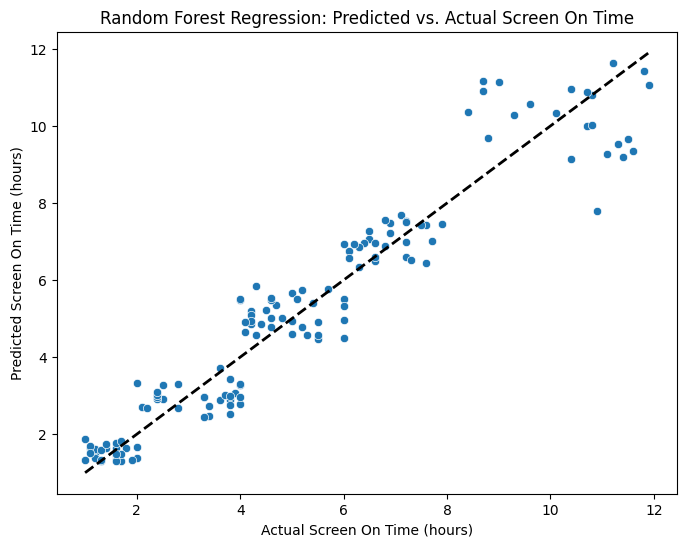

In [9]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# 1. Prepare the data
X = data[['App Usage Time (min/day)']]
y = data['Screen On Time (hours/day)']

# 2. Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)  # 80% for training, 20% for testing

# 3. Linear Regression Model
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

# 4. Random Forest Regression Model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# 5. Make predictions on the test set
linear_predictions = linear_model.predict(X_test)
rf_predictions = rf_model.predict(X_test)

# 6. Evaluate the models
linear_mse = mean_squared_error(y_test, linear_predictions)
linear_r2 = r2_score(y_test, linear_predictions)

rf_mse = mean_squared_error(y_test, rf_predictions)
rf_r2 = r2_score(y_test, rf_predictions)

print("Linear Regression:")
print("Mean Squared Error:", linear_mse)
print("R-squared:", linear_r2)

print("\nRandom Forest Regression:")
print("Mean Squared Error:", rf_mse)
print("R-squared:", rf_r2)

# Scatter plot for Linear Regression
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=linear_predictions)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k-', lw=2)  # Diagonal line for reference
plt.title('Linear Regression: Predicted vs. Actual Screen On Time')
plt.xlabel('Actual Screen On Time (hours)')
plt.ylabel('Predicted Screen On Time (hours)')
plt.show()

# Scatter plot for Random Forest Regression
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=rf_predictions)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)  # Diagonal line for reference
plt.title('Random Forest Regression: Predicted vs. Actual Screen On Time')
plt.xlabel('Actual Screen On Time (hours)')
plt.ylabel('Predicted Screen On Time (hours)')
plt.show()

# Distribution of device models based on operating systems

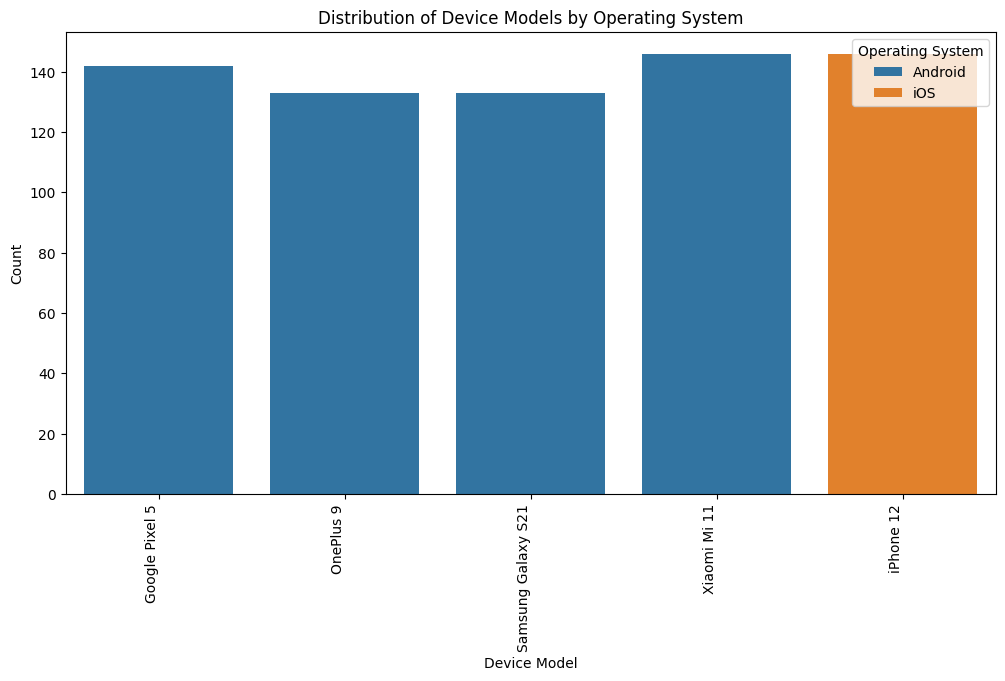

In [ ]:
os_device_counts = data.groupby(['Operating System', 'Device Model']).size().reset_index(name='Count')

plt.figure(figsize=(12, 6))
sns.barplot(x='Device Model', y='Count', hue='Operating System', data=os_device_counts)
plt.title('Distribution of Device Models by Operating System')
plt.xlabel('Device Model')
plt.ylabel('Count')
plt.xticks(rotation=90, ha='right') # Rotate x-axis labels for better readability
plt.legend(title='Operating System')
plt.show()

**We observe that Google Pixel 5, OnePlus 9, Samsung Galaxy S21 and Xiomi Mi 11 are all models that run on Adnroid operating sytem whereas iPhone 12 run on iOS operating systems**

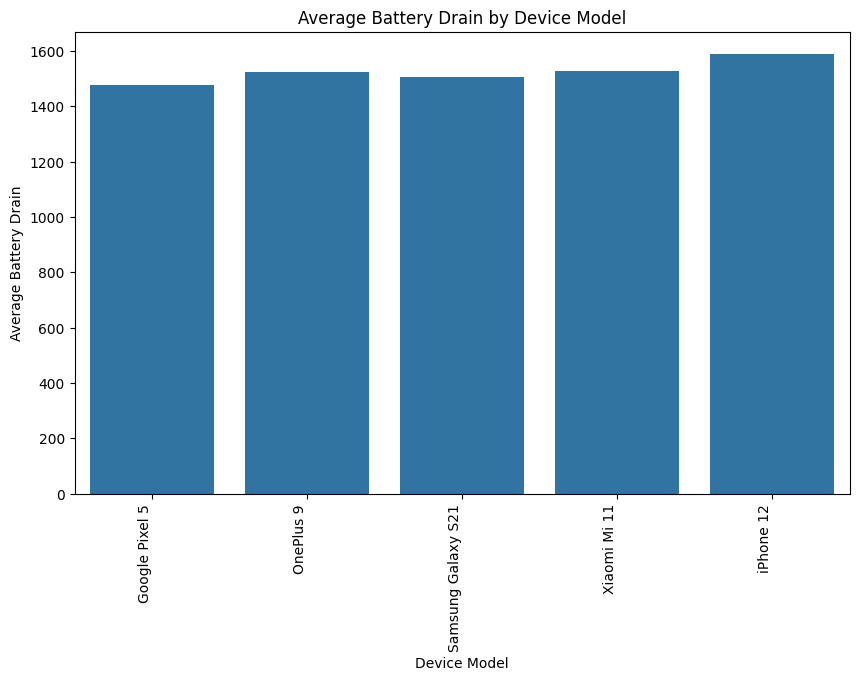

In [ ]:
# Group and calculate the average battery_drain for the device models
device_battery_drain = data.groupby('Device Model')['Battery Drain (mAh/day)'].mean().reset_index()
# visualize the data
plt.figure(figsize=(10, 6))
sns.barplot(x='Device Model', y='Battery Drain (mAh/day)', data=device_battery_drain)
plt.title('Average Battery Drain by Device Model')
plt.xlabel('Device Model')
plt.ylabel('Average Battery Drain')
plt.xticks(rotation=90, ha='right')
plt.show()

**iPhone 12 has more average battery drain compared to other device models. If one is looking to get a device with less battery drain, one can consider android devices compared to ios devices**